# Runge–Kutta algorithm

## Objectives

Work through a problem by implementing the RK2 algorithm!

First let's rewrite the Euler code from last time, with a few changes to make this more general and adaptable:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vpython import *

<IPython.core.display.Javascript object>

We can rewrite our harmonic motion equation in terms of $\mathbf{f}(t, \mathbf{y}) = \dot{\mathbf{y}}$, where this is in the standard form:

$$
\mathbf{y} =
\left(
\begin{matrix}
\dot{x} \\
x
\end{matrix}
\right)
$$

$$
\mathbf{f}(t, \mathbf{y}) =
\dot{\mathbf{y}}
=
\left(
\begin{matrix}
\ddot{x} \\
\dot{x}
\end{matrix}
\right)
=
\left(
\begin{matrix}
-\frac{k}{m} x \\
\dot{x}
\end{matrix}
\right)
=
\left(
\begin{matrix}
-\frac{k}{m} y_1 \\
y_0
\end{matrix}
\right)
$$

In [2]:
x_max = 1  # Size of x max
v_0 = 0
koverm = 1  # k / m


def f(t, y):
    "Y has two elements, x and v"
    return np.array([-koverm * y[1], y[0]])

In [3]:
def euler_ivp(f, init_y, t):
    steps = len(t)
    order = len(init_y)  # Number of equations

    y = np.empty((steps, order))
    y[0] = init_y  # Note that this sets the elements of the first row

    for n in range(steps - 1):
        h = t[n + 1] - t[n]

        # Copute dydt based on *current* position
        dydt = f(t[n], y[n])

        # Compute next velocity and position
        y[n + 1] = y[n] - dydt * h

    return y

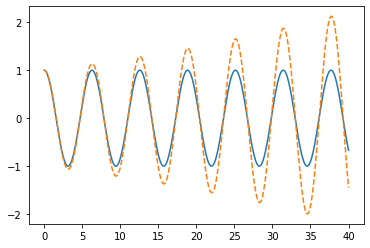

In [4]:
ts = np.linspace(0, 40, 1000 + 1)
y = euler_ivp(f, [x_max, v_0], ts)
plt.plot(ts, np.cos(ts))
plt.plot(ts, y[:, 0], "--")

## Range-Kutta introduction

Note that $h =  t_{n+1} - t_n $.

$$
\dot{y} = f(t,y)
\\
\implies y = \int f(t,y) \, dt
\\
\implies y_{n+1} = y_{n} + \int_{t_n}^{t_{n+1}} f(t,y) \, dt
$$

Now, expand $f$ in a Taylor series around the *midpoint* of the interval:

$$
f(t,y) \approx  f(t_{n+\frac{1}{2}},y_{n+\frac{1}{2}})
       + \left( t - t_{n+\frac{1}{2}}\right)
       \dot{f}(t_{n+\frac{1}{2}})
       + \mathcal{O}(h^2)
$$

The second term here is symmetric in the interval, so all we have left is the first term in the integral:

$$
\int_{t_n}^{t_{n+1}} f(t,y) \, dt \approx
    h\, f(t_{n+\frac{1}{2}},y_{n+\frac{1}{2}}) + \mathcal{O}(h^3)
$$

Back into the original statement, we get:

$$
y_{n+1} \approx
\color{blue}{
y_{n}
+ h\, f(t_{n+\frac{1}{2}},y_{n+\frac{1}{2}})
}
+ \mathcal{O}(h^3)
\tag{rk2}
$$

We've got one more problem! How do we calculate $f(t_{n+\frac{1}{2}},y_{n+\frac{1}{2}})$? We can use the Euler's algorithm that we saw last time:

$$
y_{n+\frac{1}{2}}
\approx y_n + \frac{1}{2} h \dot{y}
= \color{red}{
y_n + \frac{1}{2} h f(t_{n},y_{n})
}
$$

Putting it together, this is our RK2 algorithm:

$$
\mathbf{y}_{n+1} \approx
\color{blue}{
\mathbf{y}_{n}
+ \mathbf{k}_2
}
\tag{1.0}
$$


$$
\mathbf{k}_1 = h \mathbf{f}(t_n,\, \mathbf{y}_n)
\tag{1.1}
$$

$$
\mathbf{k}_2 = h \mathbf{f}(t_n + \frac{h}{2},\, \color{red}{\mathbf{y}_n
+ \frac{\mathbf{k}_1}{2}})
\tag{1.2}
$$

Like the book, we've picked up bold face to indicate that we can have a vector of ODEs.

In [5]:
def rk2_ivp(f, init_y, t):
    steps = len(t)
    order = len(init_y)

    y = np.empty((steps, order))
    y[0] = init_y

    for n in range(steps - 1):
        h = t[n + 1] - t[n]

        k1 = h * f(t[n], y[n])  # 1.1
        k2 = h * f(t[n] + h / 2, y[n] + k1 / 2)  # 1.2

        y[n + 1] = y[n] + k2  # 1.0

    return y

Let's try this with the same grid as before:

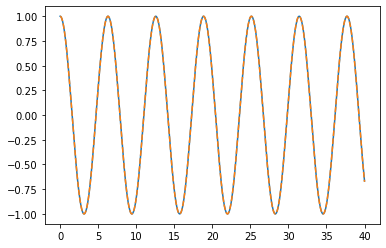

In [6]:
ts = np.linspace(0, 40, 1000 + 1)
y = rk2_ivp(f, [x_max, v_0], ts)
plt.plot(ts, np.cos(ts))
plt.plot(ts, y[:, 0], "--")

And, on a coarser grid:

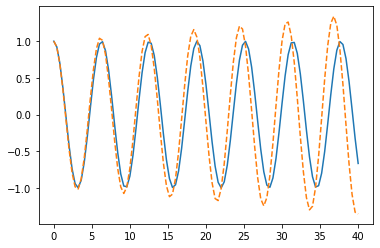

In [7]:
ts = np.linspace(0, 40, 100 + 1)
y = rk2_ivp(f, [x_max, v_0], ts)
plt.plot(ts, np.cos(ts))
plt.plot(ts, y[:, 0], "--")

In [8]:
import math

def f(t,y): return y

t, y = 0., 1.
h = 0.001   # Initial conditions and stepping (t = 0, y = 1, h = 0.001)
while t<1.:
    k1 =f(t,y)  # use Euler method to solve half-step 
    k2 = f(t+0.5*h, y+0.5*h*k1)
    y += h*k2 # full step jump RK2 solver 
    t +=h
    
y_exact = math.exp(t)

print('RK2 method: %.16f, exact: %.16f, diff: %.16f' % (y,y_exact,abs(y-y_exact)))

RK2 method: 2.7182813757517628, exact: 2.7182818284590469, diff: 0.0000004527072841


We can get the RK4 algorithm by keeping another non-zero term in the Taylor series:

$$
\mathbf{y}_{n+1} \approx
\mathbf{y}_{n}
+ \frac{1}{6} (\mathbf{k}_1 + 2 \mathbf{k}_2 + 2 \mathbf{k}_3 + \mathbf{k}_4 )
\tag{2.0}
$$

$$
\mathbf{k}_1 = h \mathbf{f}(t_n,\, \mathbf{y}_n)
\tag{2.1}
$$

$$
\mathbf{k}_2 = h \mathbf{f}(t_n + \frac{h}{2},\,
                            \mathbf{y}_n + \frac{\mathrm{k}_1}{2})
\tag{2.2}
$$

$$
\mathbf{k}_3 = h \mathbf{f}(t_n + \frac{h}{2},\,
                            \mathbf{y}_n + \frac{\mathrm{k}_2}{2})
\tag{2.3}
$$

$$
\mathbf{k}_4 = h \mathbf{f}(t_n + h,\,
                            \mathbf{y}_n + \mathrm{k}_3)
\tag{2.4}
$$

In [9]:
t, y = 0., 1. # The same initial conditions & stepping
h = 0.001
while t<1.:
    k1 =f(t,y)    #RK4 solver
    k2 = f(t+0.5*h, y+0.5*h*k1) 
    k3 = f(t+0.5*h, y+0.5*h*k2) 
    k4 = f(t+h, y+h*k3)
    y += h/6.*(k1+2.*k2+2.*k3+k4) 
    t +=h          #Simply calculate k1~k4 in a sequence and Jump to the next step
    
y_exact = math.exp(t)
print('RK4 method: %.16f, exact: %.16f, diff: %.16f' % \
(y,y_exact,abs(y-y_exact)))

RK4 method: 2.7182818284590247, exact: 2.7182818284590469, diff: 0.0000000000000222


In [10]:
def rk4_ivp(f, init_y, t):
    steps = len(t)
    order = len(init_y)

    y = np.empty((steps, order))
    y[0] = init_y

    for n in range(steps - 1):
        h = t[n + 1] - t[n]

        k1 = h * f(t[n], y[n])  # 2.1
        k2 = h * f(t[n] + h / 2, y[n] + k1 / 2)  # 2.2
        k3 = h * f(t[n] + h / 2, y[n] + k2 / 2)  # 2.3
        k4 = h * f(t[n] + h, y[n] + k3)  # 2.4

        y[n + 1] = y[n] + 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)  # 2.0

    return y

Let's try this with the same grid as before:

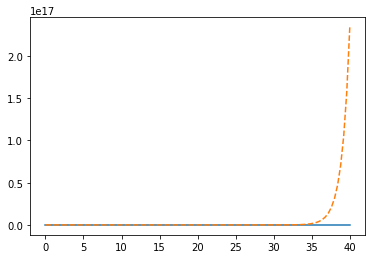

In [11]:
ts = np.linspace(0, 40, 100 + 1)
y = rk4_ivp(f, [x_max, v_0], ts)
plt.plot(ts, np.cos(ts))
plt.plot(ts, y[:, 0], "--")

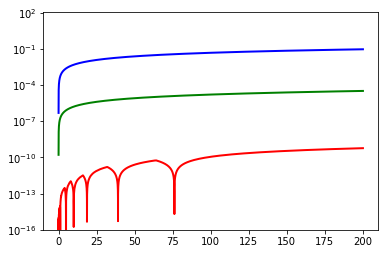

In [12]:
# Precision Evolution


vt,vy1,vy2,vy4 = [],[],[],[]
t = 0.
y1 = y2 = y4 = 1.
h = 0.001                # List for storing the output
while t<200.: # now we calculate up to t=200 
    k1 = f(t, y1) #Euler method
    y1 += h*k1 
    
    k1  = f(t, y2)
    k2  = f(t+0.5*h, y2+0.5*h*k1)
    y2 += h*k2
    
    k1 = f(t, y4) 
    k2 = f(t+0.5*h, y4+0.5*h*k1) 
    k3 = f(t+0.5*h, y4+0.5*h*k2) 
    k4 = f(t+h, y4+h*k3)
    y4 += h/6.*(k1+2.*k2+2.*k3+k4)
    t += h
    vt.append(t) 
    vy1.append(abs(y1-np.exp(t))/np.exp(t)) 
    vy2.append(abs(y2-np.exp(t))/np.exp(t)) 
    vy4.append(abs(y4-np.exp(t))/np.exp(t))
    
plt.plot(vt,vy1,lw=2,c='Blue')
plt.plot(vt,vy2,lw=2,c='Green')
plt.plot(vt,vy4,lw=2,c='Red')
plt.yscale('log')
plt.ylim(1E-16,110)
plt.show()

"Although no one algorithm will work for all possible cases, the fourth order Runge-Kutta method with adaptive step size has proved to be robust and capable of industrial strength work."

It is very similar to what people usually introduced in the numerical integration, by analyzing resulting errors and then adjust the step size in the routine.

But how could we estimate the error in the ODE solving? 

In principle we could adopt a typical idea of “reduce the step size by a factor of two”.

In [17]:
# Example with animation. Pendulum

import numpy as np
from vpython import *
from scipy.integrate import solve_ivp

 
scene = canvas(width=480, height=480)
floor = box(pos=vector(0.,-1.1,0.), length=2.2, height=0.01,
width=1.2, opacity=0.2)
ball = sphere(radius=0.05, color=color.red)
rod = cylinder(pos=vector(0.,0.,0.),axis=vector(1,0,0),
radius=0.01, color=color.white)
txt = label( pos=vec(0,1.4,0), text='', line=False)

m, g, R = 1., 9.8, 1.
t, h = 0., 0.001
y = np.array([np.pi*0.9999,0.]) 


def f(t,y):
    theta   = y[0]
    thetap  = y[1]
    thetapp = -g/R*np.sin(theta)
    return np.array([thetap,thetapp])

 
while True:
    sol = solve_ivp(f, [t, t+0.040], y) # call the ODE solver
    y   = sol.y[:,-1]
    t   = sol.t[-1]
    theta   = y[0]
    thetap  = y[1]
    ball.pos.x =  np.sin(theta)
    ball.pos.y = -np.cos(theta)
    rod.axis = ball.pos
    E = m*g*ball.pos.y + 0.5*m*(R*thetap)**2
    txt.text = 'E = %.16f' % E
    rate(1./0.040)

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [18]:
#Note on VPYTHON

 
from vpython import *

scene = canvas(width=480, height=480)
cube = box(pos=vector(0.,0.,0.))

while True:
    cube.rotate(angle=0.01)   #this will give you a rotating cube, shown in your browser!
    rate(25.) # frequency = 25 : halt the computation for 1/25 sec

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

#### Bonus: Performance boost

In [19]:
%%timeit
ts = np.linspace(0, 40, 1000 + 1)
y = rk4_ivp(f, [x_max, v_0], ts)

41.7 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Let's JIT both of these functions, and see if we can get a speedup!

In [20]:
import numba

f_jit = numba.njit(f)
rk4_ivp_jit = numba.njit(rk4_ivp)

In [21]:
%%timeit
ts = np.linspace(0, 40, 1000 + 1)
y = rk4_ivp_jit(f_jit, [x_max, v_0], ts)

/Users/aldoromero/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:2119: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'init_y' of function 'rk4_ivp'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../../../var/folders/sd/7rq2vwcx7fd8stfzsvfnz9980000gq/T/ipykernel_13333/1654690644.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


3.49 ms ± 856 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


How's that for almost 0 effort!

### RK 4(5)

This is the "adaptive" step solver from the book. It's a bit more readable, and a logical error was fixed. The definition of the tolerance seems to be different than scipy. The 4th order Runge-Kutta method provides an excellent balance of power, precision, and programming simplicity

In [22]:
def rk45_ivp(f, init_y, t_range, tol=1e-8, attempt_steps=20):
    order = len(init_y)  # Number of equations

    y = [np.array(init_y)]
    t = [t_range[0]]
    err_sum = 0

    # Step size and limits to step size
    h = (t_range[1] - t_range[0]) / attempt_steps
    hmin = h / 64
    hmax = h * 64

    while t[-1] < t_range[1]:

        # Last step should just be exactly what is needed to finish
        if t[-1] + h > t_range[1]:
            h = t_range[1] - t[-1]

        # Compute k1 - k6 for evaluation and error estimate
        k1 = h * f(t[-1], y[-1])
        k2 = h * f(t[-1] + h / 4, y[-1] + k1 / 4)
        k3 = h * f(t[-1] + 3 * h / 8, y[-1] + 3 * k1 / 32 + 9 * k2 / 32)
        k4 = h * f(
            t[-1] + 12 * h / 13,
            y[-1] + 1932 * k1 / 2197 - 7200 * k2 / 2197 + 7296 * k3 / 2197,
        )
        k5 = h * f(
            t[-1] + h,
            y[-1] + 439 * k1 / 216 - 8 * k2 + 3680 * k3 / 513 - 845 * k4 / 4104,
        )
        k6 = h * f(
            t[-1] + h / 2,
            y[-1]
            + 8 * k1 / 27
            + 2 * k2
            - 3544 * k3 / 2565
            + 1859 * k4 / 4104
            - 11 * k5 / 40,
        )

        # Compute error from higher order RK calculation
        err = np.abs(
            k1 / 360 - 128 * k3 / 4275 - 2197 * k4 / 75240 + k5 / 50 + 2 * k6 / 55
        )

        # Compute factor to see if step size should be changed
        s = 0 if err[0] == 0 or err[1] == 0 else 0.84 * (tol * h / err[0]) ** 0.25

        lower_step = s < 0.75 and h > 2 * hmin
        raise_step = s > 1.5 and 2 * h < hmax
        no_change = not raise_step and not lower_step

        # Accept step and move on
        if err[0] < tol or err[1] < tol or no_change:
            y.append(
                y[-1] + 25 * k1 / 216 + 1408 * k3 / 2565 + 2197 * k4 / 4104 - k5 / 5
            )
            t.append(t[-1] + h)

        # Grow or shrink the step size if needed
        if lower_step:
            h /= 2
        elif raise_step:
            h *= 2

    return np.array(t), np.array(y)

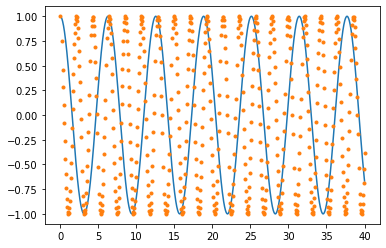

In [23]:
ts = np.linspace(0, 40, 1000 + 1)
t, y = rk45_ivp(f, [x_max, v_0], [0, 40], 0.005)
plt.plot(ts, np.cos(ts))
plt.plot(t, y[:, 0], ".")

Let's compare it with the scipy algorithm:

In [24]:
import scipy.integrate

In [25]:
r45 = scipy.integrate.solve_ivp(f, [0, 40], [x_max, v_0], rtol=0.00001)

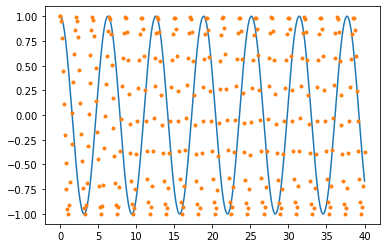

In [26]:
r45
plt.plot(ts, np.cos(ts))
plt.plot(r45.t, r45.y[0], ".")